## Exercício 20
### Análise de Consumo de Energia e Emissões de CO2 
### Análises e Visualizações:

In [1]:
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
df = pd.read_csv("dados_energia_simulados_ptbr.csv")
display(df)

,Ano,Continente,País,Setor,Consumo_Energia_Renovável (MWh),Consumo_Energia_Fóssil (MWh),Emissões_CO2 (toneladas),PIB (milhões de USD),População (milhões)
0,2016,Oceania,China,Comercial,7397.685031,12535.546950,78910.224574,2.463037e+06,165.908531
1,2020,América do Sul,Brasil,Transporte,971.598203,10036.494790,93896.756176,6.152132e+06,19.864661
2,2003,América do Sul,China,Indústria,5455.079849,6789.106081,22068.881619,2.228470e+06,184.533453
3,2019,América do Sul,China,Indústria,2778.436239,12941.548015,49534.631946,6.481451e+06,134.801730
4,2019,América do Sul,Rússia,Residencial,6429.091172,11755.142517,117101.029860,3.262370e+06,76.268548
...,...,...,...,...,...,...,...,...,...
1995,2015,Ásia,Rússia,Transporte,6174.180266,15064.717870,46007.220740,4.508684e+06,88.329964
1996,2004,América do Norte,Austrália,Residencial,5830.025049,11171.756011,94509.378347,3.220615e+06,183.781460
1997,2004,Ásia,China,Indústria,3582.590823,15129.916098,148449.630977,5.943108e+06,137.441825
1998,2009,Oceania,Estados Unidos,Residencial,2798.483361,10352.844393,50669.152564,5.887057e+06,50.080865


In [2]:
df.describe()

,Ano,Consumo_Energia_Renovável (MWh),Consumo_Energia_Fóssil (MWh),Emissões_CO2 (toneladas),PIB (milhões de USD),População (milhões)
count,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000
mean,2010.991000,5047.241453,9972.486177,99890.594067,4.991574e+06,99.571949
std,6.750534,1989.358867,5115.427170,50561.848340,1.979496e+06,50.500185
min,2000.000000,-1376.610759,-7908.823002,-67666.540624,-2.207004e+06,-61.365517
25%,2005.000000,3628.462963,6534.967027,64374.810818,3.603225e+06,65.267282
50%,2011.000000,5048.885126,9871.284228,100749.256341,5.066709e+06,98.684757
75%,2017.000000,6486.014516,13310.305836,135078.752569,6.328770e+06,133.097287
max,2022.000000,11590.030991,29338.727046,249096.437916,1.130907e+07,289.533188


### • Crie um Boxplot que compare o consumo de energias renováveis e fósseis por continente.

In [3]:
df = df.sort_values(by="Ano")
energia_Renovavel_e_Fossil = df.groupby(["Continente","Ano"]).agg({"Consumo_Energia_Renovável (MWh)": ["sum"],
                                                  "Consumo_Energia_Fóssil (MWh)": ["sum"],
                                                    "Emissões_CO2 (toneladas)": "mean"}).reset_index()
energia_Renovavel_e_Fossil


,Continente,Ano,Consumo_Energia_Renovável (MWh),Consumo_Energia_Fóssil (MWh),Emissões_CO2 (toneladas)
,,,sum,sum,mean
0,América do Norte,2000,56956.608529,137819.639685,113433.567598
1,América do Norte,2001,108317.302959,229094.441592,99383.607983
2,América do Norte,2002,124945.691702,266825.635368,106401.831634
3,América do Norte,2003,52366.648443,83029.074755,101202.650526
4,América do Norte,2004,77393.698013,151822.998408,122097.291518
...,...,...,...,...,...
133,Ásia,2018,62450.438828,121426.801195,108504.319146
134,Ásia,2019,40361.204496,43331.518247,110886.396524
135,Ásia,2020,56312.887043,98753.364016,125144.942911


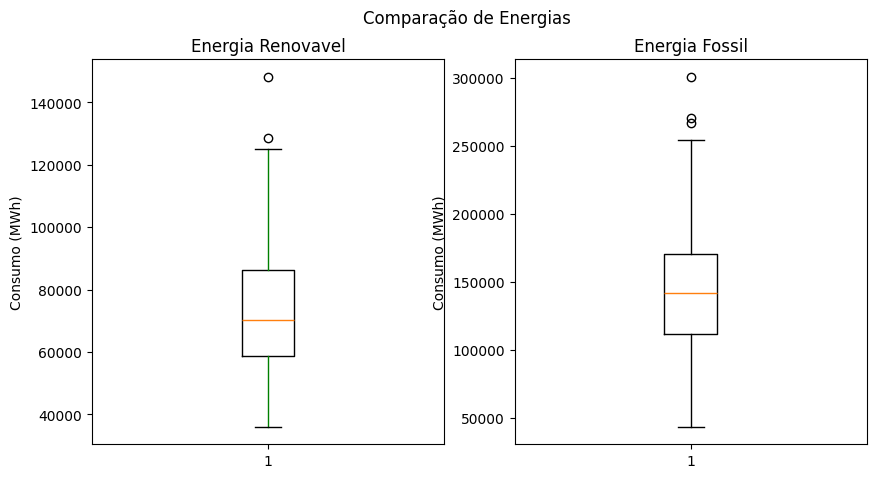

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
plt.suptitle("Comparação de Energias")
axs[0].boxplot(energia_Renovavel_e_Fossil["Consumo_Energia_Renovável (MWh)"],whiskerprops=dict(color="green"))
axs[0].set_title("Energia Renovavel")
axs[0].set_ylabel("Consumo (MWh)")
axs[1].boxplot(energia_Renovavel_e_Fossil["Consumo_Energia_Fóssil (MWh)"])
axs[1].set_title("Energia Fossil")
axs[1].set_ylabel("Consumo (MWh)")

plt.show()

### • Use gráficos de linha para mostrar a evolução do consumo de energias renováveis e fósseis e as emissões de CO2 ao longo do tempo.

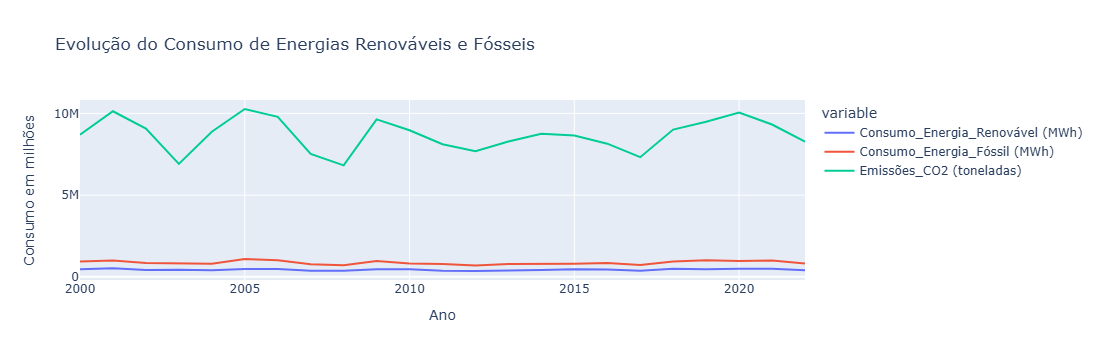

In [115]:
df_agrupado = df.groupby("Ano").sum()

fig = px.line(df_agrupado, x=df_agrupado.index, y=["Consumo_Energia_Renovável (MWh)",
                                                "Consumo_Energia_Fóssil (MWh)",
                                                "Emissões_CO2 (toneladas)"]
              ,title=("Evolução do Consumo de Energias Renováveis e Fósseis"))

fig.update_layout(
    xaxis_title="Ano",
    yaxis_title="Consumo em milhões",)

fig.show()

### • Visualize a contribuição dos setores (indústria, transporte, etc.) para as emissões de CO2 por continente.

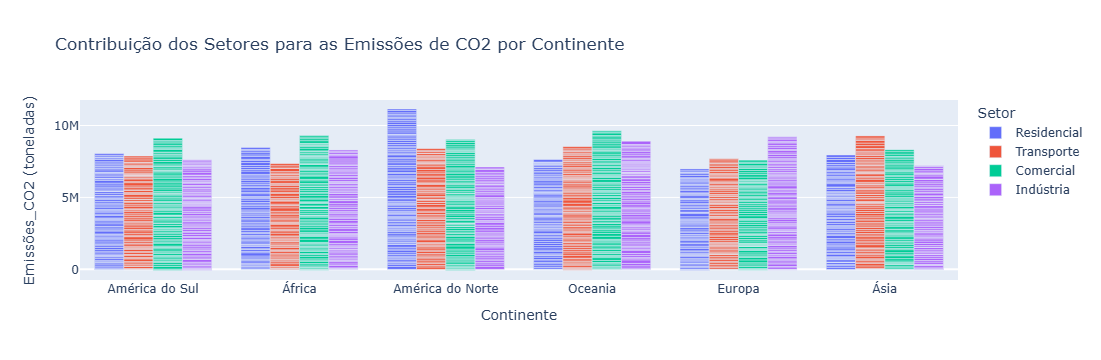

In [121]:
fig = px.bar(df, x="Continente", y="Emissões_CO2 (toneladas)", color="Setor",
             barmode='group',
             title="Contribuição dos Setores para as Emissões de CO2 por Continente", 
            hover_data=["Ano"])
fig.show()

### • Crie gráficos de dispersão para analisar a correlação entre o consumo de energia fóssil e as emissões de CO2 por continente, incluindo uma linha de regressão.

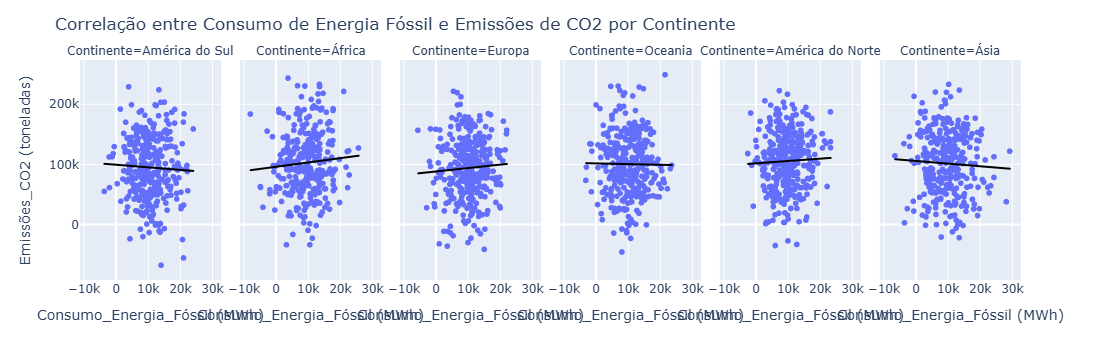

In [13]:
fig_2 = px.scatter(df, x="Consumo_Energia_Fóssil (MWh)", y="Emissões_CO2 (toneladas)",
                    trendline="ols", trendline_color_override="black", facet_col="Continente")
fig_2.update_layout(
    title="Correlação entre Consumo de Energia Fóssil e Emissões de CO2 por Continente")
fig_2.show()

### • Crie gráficos interativos que permitam visualizar como o consumo energético impacta as emissões ao longo do tempo em diferentes regiões.

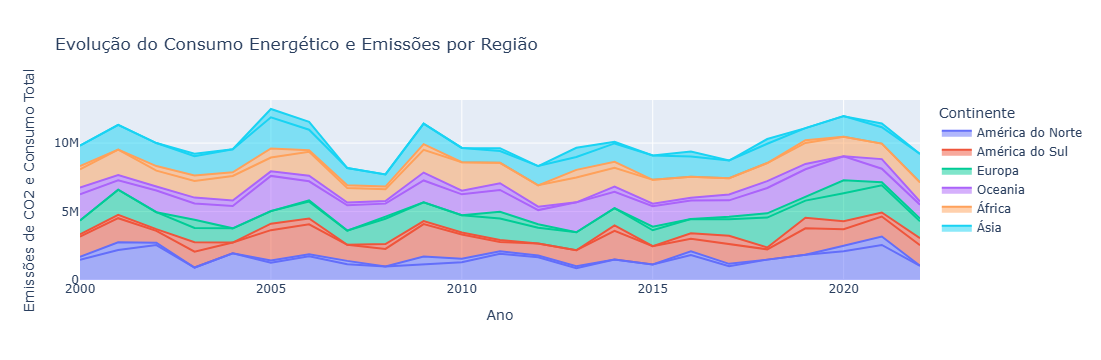

In [119]:
df["Consumo_Total (MWh)"] = df_agrupado2["Consumo_Energia_Renovável (MWh)"] + df_agrupado2['Consumo_Energia_Fóssil (MWh)']
df_agrupado2 = df.groupby(["Continente", "Ano"]).sum().reset_index()
fig_3 = px.line(df_agrupado2, x="Ano", y=["Emissões_CO2 (toneladas)"], color="Continente",
              title="Evolução do Consumo Energético e Emissões por Região")

fig_3 = px.area(df_agrupado2, x="Ano",
               y=["Emissões_CO2 (toneladas)", "Consumo_Total (MWh)"],
               color="Continente",
               title="Evolução do Consumo Energético e Emissões por Região",
               labels={
               })

fig_3.update_layout(
    yaxis_title="Emissões de CO2 e Consumo Total",
)

fig_3

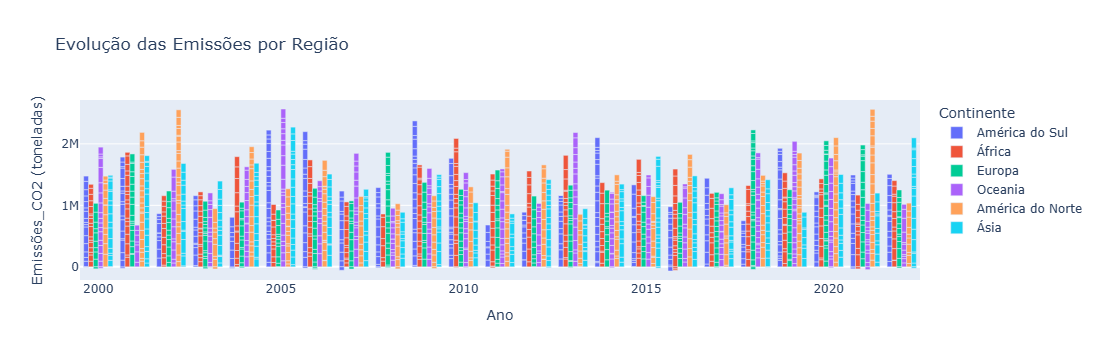

In [120]:
fig_3 = px.bar(df, x='Ano', y="Emissões_CO2 (toneladas)", color='Continente',
                barmode="group"
                ,hover_name="consumo_total"
                ,title='Evolução das Emissões por Região')
fig_3.show()

### Explique como o consumo de energia está relacionado às emissões de CO2, destacando diferenças regionais e setoriais.

#### Sabia que a forma como produzimos Energia e á consumimos está gerando um impacto significativo no meio ambiente? Mas Por qué?
#### Uma das principales fontes de Energia que consumimos vem da queima de combustivel fossil(carvão, petróleo e gás natural, a diferenção da queima de papel esta influi mais na emissão de CO2 o qual afeta o meio ambiente de forma direta e significativa, gerando mais aquecimento global, mudanças climáticas e poluição do ar e da água, podendo também afetar nossa saude.

#### Como podemos ver nos graficos um dos setores que mais tem Consumido Energia e gerado mais CO2 seria o Comercial(Centros Comerciais, Hotéis e Restaurantes), influindo na geração de CO2 de forma drastica, como támbem podemos visualizar que o Continente de America do Norte tem gerado uma grande cantidades de CO2 no seu setor Residencial neste ultimos anos. Outro dos setores que sobre sai seria o setor Industrial, principal mente no continente Europeo, mas agora devem estar se perguntando, como podemos contibuir para que para que esta Emissão de CO2 disminua em vez de aumentar a cada ano.

#### Uma das principais soluções seria optar por ussar mais a Energia Renovavel, pois a diferença da Energia Fossil esta gera pouca ou nenhuma emissão de gas, uma destas seria a Energia Solar, esta tem sido muito usada nos ultimos anos, sendo a principal fonte o sol, outras Energias Renovaveis seriam, Energia Eólica, Energia Hidrica, Energia Geotérmica. O uso deste tipo de Energias e seu desenvolvimento pode ajudar na Emissão de CO2, a pesar que já tem varias empresas tomando iniciativa e atuando em pró de combatir a Emissão de CO2, cada um pode fazer a diferença com sua ação individual, lembrando que um grão de areia por si só não seja muito significativo, mas muitos unidos podem criar uma praia!